In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('fashion-mnist_train.csv')

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

In [21]:
'''
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''
fashion = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def showIMG(x):
    print('Label : ', fashion[df.iloc[x].iloc[0]])
    pixels = df.iloc[x][1:]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    fig = plt.figure
    plt.imshow(pixels, cmap = 'gray')
    plt.show()

Label :  Shirt


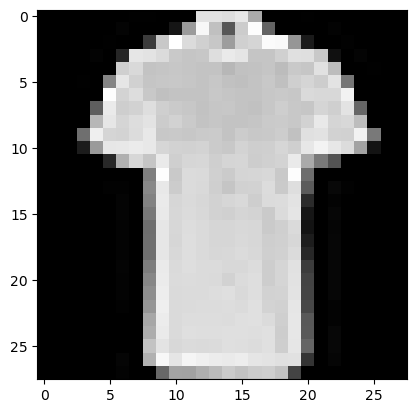

In [23]:
showIMG(155)

# Model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [90]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units=28, activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=10, activation='linear')

    ])

In [92]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 28)                  │          21,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 25)                  │             725 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,965 (89.71 KB)

 Trainable params: 22,965 (89.71 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
X = df.iloc[:,1:]
y = df['label']

In [96]:
tf.random.set_seed(1234) # for uniform model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit( X,y, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - loss: 5.3371
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - loss: 1.4602
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - loss: 1.2882
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 1.2484
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - loss: 1.1662
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - loss: 1.0443
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - loss: 0.9539
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.9024
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - loss: 0.9000
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - loss: 0.8738
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - loss: 0.8660
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - loss: 0.8642
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - loss: 0.8585
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - loss: 0.8554
E

In [97]:
df_test = pd.read_csv('fashion-mnist_test.csv')

In [98]:
X_test = df_test.iloc[:,1:]
y_test = df_test['label']

In [99]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step


In [100]:
print(f" predicting a {fashion[y_test[0]]}: \n{pred[0]}")
print(f" Largest Prediction index: {np.argmax(pred[0])} and it is {fashion[np.argmax(pred[0])]} ")

 predicting a T-shirt/top: 
[ 2.0090008e+01  1.5031262e+01  1.6128050e+01  1.5403909e+01
  1.1829294e+01  2.6612716e+00  1.7956869e+01 -1.2439254e+02
  1.4033284e+01  4.4319630e-02]
 Largest Prediction index: 0 and it is T-shirt/top 


In [101]:
wrong_ind = []
n = y_test.shape[0]
for i in range(n):
    correct = y_test.iloc[i]
    y_pred = np.argmax(pred[i])
    if(correct!=y_pred):
        wrong_ind.append(i)

In [102]:
len(wrong_ind)

2098

In [103]:
def showImgTest(x):
    print('Label :', fashion[df_test.iloc[x].iloc[0]])
    pixels = df_test.iloc[x][1:]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    fig = plt.figure
    plt.imshow(pixels, cmap = 'gray')
    plt.show()
    
def comparison(x):
    print(f"Prediction : {fashion[np.argmax(pred[x])]}")
    showImgTest(x)

Prediction : Shirt
Label : Coat


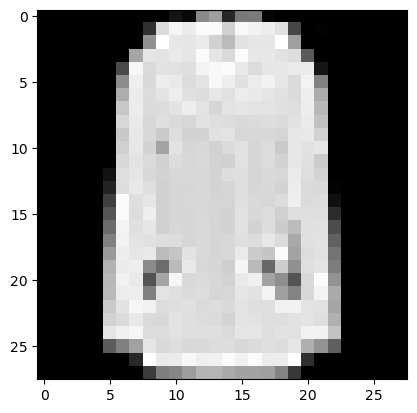

In [104]:
comparison(wrong_ind[200])

In [105]:
y_pred_num = []
n = y_test.shape[0]
for i in range(n):
    y_pred_num.append(np.argmax(pred[i]))

In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_num, y_test)
print('Accuracy :',accuracy)

Accuracy : 0.7902
